## Random Matrix Theory

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit
import subprocess

In [2]:
compiled_dir = f'..{os.sep}compiled'
plot_dir = f'..{os.sep}plots'

In [3]:
program = f'{compiled_dir}{os.sep}exercise_2'

### Hermitian Matrix

In [4]:
output_filename = "../data/histogram_hermitian.csv"

In [ ]:
output = subprocess.run([
    program,
    "--ndim", "1000",
    "--nsamples", "1000",
    "--output_filename", output_filename
])

 mat_type = hermitian                                         
 output_filename = ../data/histogram_hermitian.csv                   
 ndim = 1000    
 nsamples = 1000    
 nbins = 100     
 min_val = 0.000   
 max_val = 5.000   


In [72]:
hist = []

with open(output_filename) as f:
    csv_reader = csv.reader(f)
    for row in csv_reader:
        hist.append(row)

In [73]:
bin_centers = [float(a[1]) for a in hist[1:]]
norm_count = [float(a[3]) for a in hist[1:]]

Confirm the area under the curve is 1.

In [74]:
sum([n * 5/100 for n in norm_count])

0.9977416349999997

Perform fit.

In [75]:
def func(x, a, b, alpha, beta):
    return a * x ** alpha * np.exp(b * x ** beta)
popt, pcov = curve_fit(func, bin_centers, norm_count)
popt

array([14.48245668, -2.87462434,  2.61839062,  1.3121129 ])

In [76]:
perr = np.sqrt(np.diag(pcov))
perr

array([2.43682575, 0.16992589, 0.09256705, 0.04309198])

In [77]:
num_pts_interp = 1000
s_interp = np.linspace(bin_centers[0], bin_centers[-1], num_pts_interp)
y_fit = [func(s, *popt) for s in s_interp]

Plot the result.

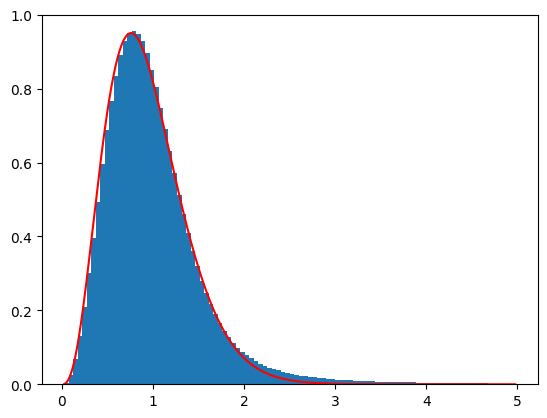

In [78]:
plt.hist(bin_centers, bins=len(norm_count), weights=norm_count)
plt.plot(s_interp, y_fit, 'r')
plt.ylim([0, 1])
plt.savefig("../plots/eigenvalue_spacings_dist_hermitian.pdf", format="pdf", bbox_inches="tight");

### Real Diagonal Matrix

In [79]:
output_filename = "../data/histogram_diagonal.csv"

In [81]:
output = subprocess.run([
    program,
    "--mat_type", "diag",
    "--ndim", "2000",
    "--nsamples", "2000",
    "--output_filename", output_filename
])

 mat_type = diag                                              
 output_filename = ../data/histogram_diagonal.csv                    
 ndim = 2000    
 nsamples = 2000    
 nbins = 100     
 min_val = 0.000   
 max_val = 5.000   


In [82]:
hist = []

with open(output_filename) as f:
    csv_reader = csv.reader(f)
    for row in csv_reader:
        hist.append(row)

In [83]:
bin_centers = [float(a[1]) for a in hist[1:]]
norm_count = [float(a[3]) for a in hist[1:]]

In [84]:
sum([n * 5/100 for n in norm_count])

0.9932874099999996

In [85]:
popt_diag, pcov_diag = curve_fit(func, bin_centers, norm_count)

/var/folders/29/57ctygt16nb459fzj64lth0r0000gq/T/ipykernel_71781/703952185.py:2: RuntimeWarning: overflow encountered in exp
  return a * x ** alpha * np.exp(b * x ** beta)


In [86]:
popt_diag

array([ 1.02145577, -1.02271221,  0.00631162,  0.98642522])

In [87]:
perr_diag = np.sqrt(np.diag(pcov_diag))
perr_diag

array([0.00380132, 0.00405037, 0.00108696, 0.00264868])

In [88]:
s_interp = np.linspace(bin_centers[0], bin_centers[-1], num_pts_interp)
y_fit = [func(s, *popt_diag) for s in s_interp]

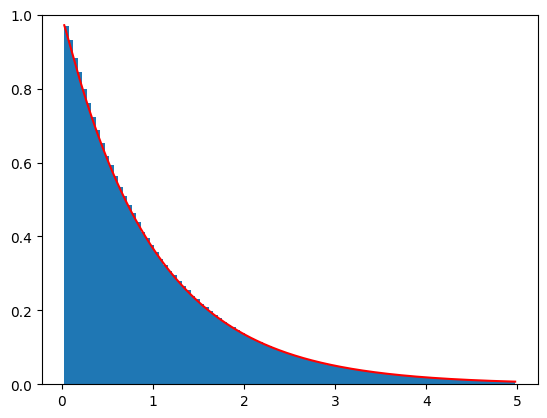

In [89]:
plt.hist(bin_centers, bins=len(norm_count), weights=norm_count)
plt.plot(s_interp, y_fit, 'r')
plt.ylim([0, 1])
plt.savefig("../plots/eigenvalue_spacings_dist_diag.pdf", format="pdf", bbox_inches="tight");